# Deep Learning on Tabular Data Solutions


## Exercises - XOR Problem

The XOR (exclusive OR) is a logical operation that takes two binary outputs and returns TRUE if exactly one of them is TRUE. For example:
- f(1, 0) = 1
- f(1, 1) = 0
- f(0, 1) = 1
- f(0, 0) = 0

With `f` as an arbitrary function. We provide you a XOR-like dataset with 80 samples and 2 labels as below:

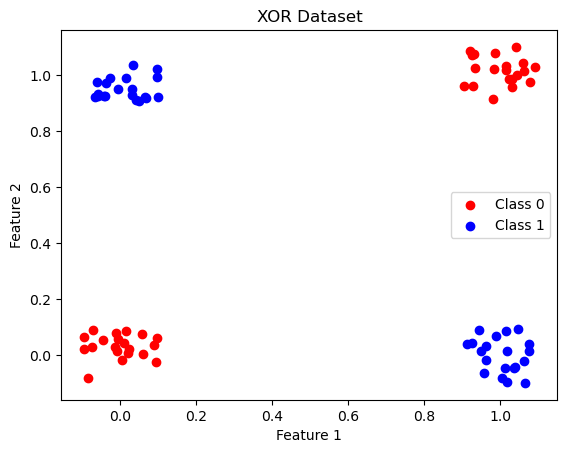

In [8]:
# ONLY RUN & DO NOT MODIFY
import numpy as np
import matplotlib.pyplot as plt

# Create XOR dataset
np.random.seed(0)

# Create points around the corners of the XOR problem
X_corners = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_corners = np.array([0, 1, 1, 0])

# Generate additional random samples in each quadrant
num_samples_per_corner = 20
X_samples = []
y_samples = []

for x, y in X_corners:
    # Generate samples around each corner
    X_samples.append(np.random.rand(num_samples_per_corner, 2) * 0.2 + np.array([x - 0.1, y - 0.1]))
    y_samples.append(np.full((num_samples_per_corner,), y_corners[np.where((X_corners == [x, y]).all(axis=1))[0][0]]))

X_samples = np.vstack(X_samples)
y_samples = np.concatenate(y_samples)

# Step 2: Split Data into Training and Validation Sets
# Ensure that each class is represented in both sets
indices = np.arange(len(X_samples))
np.random.shuffle(indices)

# Manually split to maintain distribution
train_indices = []
val_indices = []

for i in range(4):  # For each corner
    corner_indices = indices[i*num_samples_per_corner:(i+1)*num_samples_per_corner]
    train_indices.extend(corner_indices[:int(num_samples_per_corner * 0.7)])  # 70% for training
    val_indices.extend(corner_indices[int(num_samples_per_corner * 0.7):])    # 30% for validation

train_X_xor = X_samples[train_indices]
train_y_xor = y_samples[train_indices]
val_X_xor = X_samples[val_indices]
val_y_xor = y_samples[val_indices]

plt.scatter(X_samples[y_samples == 0][:, 0], X_samples[y_samples == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_samples[y_samples == 1][:, 0], X_samples[y_samples == 1][:, 1], color='blue', label='Class 1')
plt.title('XOR Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Your tasks are:

1. Define an MLP with one hidden layer and fit this dataset. Run 1000 iteration.
2. Define an MLP with 8 hidden layers and fit this dataset. Run 1000 iteration.
3. Look at the decision boundary, and try to explain the results. Hint: check which model provides better decision boundary, and why it is the case.

Hint: use `train_X_xor, train_y_xor` for training, and `val_X_xor`, `val_y_xor` for testing.

In [9]:
# YOUR CODE HERE
# define, fit, and predict the first model with one hidden layer. 
# Hint 1: MLPClassifier(hidden_layer_sizes=(number_layer, ), max_iter=num_iterations)
# Hint 2: the accuracy should never reach 80% 
mlp_hidden_1 = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000) # define the model
mlp_hidden_1.fit(train_X_xor, train_y_xor) # fit the model
preds_hidden_1 = mlp_hidden_1.predict(val_X_xor) # predict the model
accuracy_score(val_y_xor, preds_hidden_1) # compute the accuracy

0.3333333333333333

In [11]:
# YOUR CODE HERE
# define, fit, and predict the first model with 8 hidden layers. 
# Hint 1: MLPClassifier(hidden_layer_sizes=(number_layer, ), max_iter=num_iterations)
# Hint 2: the accuracy can reach 100%. Try to re-run until you get accuracy=1.0
mlp_hidden_8 = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000) # define the model
mlp_hidden_8.fit(train_X_xor, train_y_xor) # fit the model
preds_hidden_8 = mlp_hidden_8.predict(val_X_xor) # predict the model
accuracy_score(val_y_xor, preds_hidden_8) # compute the accuracy

1.0

- The XOR function outputs TRUE only when the inputs differ, which means that the data points corresponding to the outputs cannot be separated by a single linear decision boundary. This arrangement requires at least two linear boundaries to classify correctly, which a single-layer MLP cannot provide. 

- Adding more hidden layers to an MLP enhances its capability to learn more non-linear complex functions like XOR, thanks to many activation layers stacked together. The multi-layer approach allows the network to approximate non-linear functions effectively, as it can create multiple decision boundaries.

- Stacking hidden layers to improve the performance can be explained through the Universal Approximation Theorem, which states that a feedforward neural network with at least one hidden layer containing a finite number of neurons can approximate any continuous function on compact subsets of $\mathbb{R}^n$. However, it only tells you that such function exists, but it does not describe how it looks like. The learning process can be further improved by combatting against overfitting or vanishing/exploding gradients, which are not the main goal of this lecture.


# Exercise
Note here that we have an additional categorical column called `education-num_na`. Why?

The `FillMissing` processor imputes missing values and, for columns with missing data, automatically adds a new column with the suffix `_na` to mark which rows originally had missing values. Since the `education-num` column contains missing values, it will create a new column called `education-num_na`, where 1 indicates a missing value was imputed, and 0 shows the value was not missing.

# Exercise
Can you explain the individual components of the previous outputs? I.e. what is contained in the individual tensors? (Hint: look at the dimensions of the tensors)

The function `one_batch` returns a single batch of training data for you to inspect. It contains a tuple of the input features and the target, encoded in tensor objects. The structure of the tensor depends on how the features and targets are processed. In this particular case, we can see that the first tensor consists of the categorical encoded features used for predictions or classification. The shape shows that each row corresponds to one data point, and the columns represent the different features. The same holds for the other tensors.
The second tensor then represents the normalized continuous features (age, fnlwgt and education-num) and the third one the target.